# Artificial Neural Network (ANN) Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# นำเข้าข้อมูล

In [2]:
# โหลดข้อมูลจากไฟล์ CSV
data = pd.read_csv('DataComsci.csv')  # อ่านข้อมูลจากไฟล์ CSV

# ดูตัวอย่างข้อมูล
print(data.describe())

print(data.columns.tolist())

data

       GRADUATEYEAR     STUDENTID  GPAgraduate
count    343.000000  3.430000e+02   343.000000
mean    2564.303207  1.002616e+08     2.610554
std        1.389672  1.621539e+04     0.413158
min     2562.000000  1.002056e+08     2.000000
25%     2563.000000  1.002492e+08     2.310000
50%     2564.000000  1.002611e+08     2.540000
75%     2566.000000  1.002712e+08     2.815000
max     2566.000000  1.002872e+08     3.970000
['GRADUATEYEAR', 'STUDENTID', 'CalculusforScience', 'FundamentalsOfProgramming', 'HistoryAndDevelopmentOfComputerTechnology', 'MathematicsForScience', 'ObjectOrientedProgramming', 'ThaiLanguageSkills', 'PoliticsEconomyandSociety', 'PhilosophyOfScience', 'ManAndEnvironment', 'LifeSkills', 'LanguageSocietyAndCulture', 'EnglishCriticalReadingForEffectiveCommunication', 'ComputerArchitecture', 'DataStructure', 'DatabaseSystems', 'DiscreteMathematicsForComputerScience', 'LinearAlgebraAndApplications', 'OperatingSystems', 'StatisticalAnalysis', 'EnglishWritingForEffectiveCommu

,GRADUATEYEAR,STUDENTID,CalculusforScience,FundamentalsOfProgramming,HistoryAndDevelopmentOfComputerTechnology,MathematicsForScience,ObjectOrientedProgramming,ThaiLanguageSkills,PoliticsEconomyandSociety,PhilosophyOfScience,...,IntroductionToRobotics,LifeAndHealth,LifePrivacy,MultimediaApplicationDevelopment,MusicStudiesInThaiCulture,ProgrammingLanguages,Seminar,SpecialTopicsInComputerScience,SystemAnalysisAndDesign,GPAgraduate
0,2562,100205568,D+,B+,NaN,C+,D,C+,C,C+,...,NaN,NaN,NaN,NaN,NaN,D,B,NaN,C+,2.10
1,2562,100205606,D,B+,NaN,D+,D,C,NaN,C+,...,NaN,B+,NaN,NaN,C,D,C+,NaN,C,2.00
2,2564,100215265,F,B,NaN,D+,D+,C,C+,C+,...,NaN,NaN,NaN,NaN,NaN,D,B,C+,C,2.01
3,2562,100225543,F,C+,NaN,F,D,C+,NaN,C+,...,NaN,NaN,NaN,B,B+,D,B,C,C+,2.10
4,2565,100225544,F,C+,NaN,F,C,B,NaN,C+,...,B,NaN,NaN,NaN,C+,C,B,NaN,C,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2566,100282344,D,D+,A,D,D,NaN,NaN,NaN,...,NaN,A,NaN,NaN,NaN,NaN,A,NaN,D+,2.34
339,2566,100282356,C+,C,A,A,B+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,NaN,A,NaN,B+,3.19
340,2566,100282359,C,C,A,D+,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,NaN,A,NaN,C+,2.68
341,2566,100282360,D,C,A,D,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,C,2.52


# ขั้นตอนที่ 1: เตรียมข้อมูล

In [3]:
# แปลงเกรดเป็นค่าตัวเลข
grade_mapping = {'A': 4.0, 'B+': 3.5, 'B': 3.0, 'C+': 2.5, 'C': 2.0, 'D+': 1.5, 'D': 1.0, 'F': 0.0}
data.replace(grade_mapping, inplace=True)

# แทนค่าที่หายไปด้วยค่าเฉลี่ยของแต่ละคอลัมน์สำหรับคอลัมน์ตัวเลข
data.fillna(data.mean(numeric_only=True), inplace=True)

# เลือกฟีเจอร์ที่เกี่ยวข้อง (รายวิชาที่จะใช้ทำนาย GPA)
features = [
        'CalculusforScience', 'FundamentalsOfProgramming', 'HistoryAndDevelopmentOfComputerTechnology',
        'MathematicsForScience', 'ObjectOrientedProgramming', 'ThaiLanguageSkills',
        'PoliticsEconomyandSociety', 'PhilosophyOfScience', 'ManAndEnvironment',
        'LifeSkills', 'LanguageSocietyAndCulture', 'EnglishCriticalReadingForEffectiveCommunication',
        'ComputerArchitecture', 'DataStructure', 'DatabaseSystems',
        'DiscreteMathematicsForComputerScience', 'LinearAlgebraAndApplications',
        'OperatingSystems', 'StatisticalAnalysis', 'EnglishWritingForEffectiveCommunication',
        'AlgorithmDesignandAnalysis', 'ArtificialIntelligence', 'ComputerNetworkAndDataCommunication',
        'Seminar', 'SoftwareEngineering', 'DataMiningTechniques', 
        'MobileApplicationDevelopment', 'MultimediaAnd WebTechnology', 
        'SensingAndActuationForInternetOfThings','SystemAnalysisAndDesign'
]  # แทนที่ด้วยรายชื่อฟีเจอร์ที่คุณต้องการ

X = data[features]  # สร้าง DataFrame สำหรับฟีเจอร์

# แปลงฟีเจอร์ที่เป็นประเภทข้อความ (categorical) ถ้ามี
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    # ลบค่า NaN และตรวจสอบให้แน่ใจว่าคอลัมน์มีประเภทข้อมูลเป็นข้อความอย่างเดียว
    if X[col].isnull().all():  # ตรวจสอบว่าคอลัมน์เป็น NaN ทั้งหมด
        continue
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # แปลงเป็นสตริงเพื่อหลีกเลี่ยงประเภทข้อมูลผสม
        label_encoders[col] = le

# ตัวแปรเป้าหมาย (GPA)
y = data['GPAgraduate']

### ตรวจสอบขนาดของ X และ y


In [4]:
print(X.shape)
print(y.shape)

(343, 30)
(343,)


# ขั้นตอนที่ 2: แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ

In [5]:
# แบ่งข้อมูลเป็นชุดฝึก (train) และชุดทดสอบ (test) ในสัดส่วน 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำการปรับมาตรฐานข้อมูล (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ขั้นตอนที่ 3: สร้างโมเดล ANN และฝึกสอน

In [6]:
model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(X_train.shape[1],)))  # เลเยอร์แรก
model.add(Dense(15, activation='relu'))  # เลเยอร์ที่สอง
model.add(Dense(1))  # เลเยอร์สุดท้าย (สำหรับการทำนาย)

# คอมไพล์โมเดล
model.compile(optimizer= Adam(learning_rate = 0.075 ), loss='mean_squared_error')

# ดูภาพรวมของโครงสร้างโมเดล
model.summary()

# ฝึกโมเดล
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_split=0.2, verbose=1)

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,181 (4.61 KB)

 Trainable params: 1,181 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.7701 - val_loss: 3.6753
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5789 - val_loss: 1.3035
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5418 - val_loss: 0.3578
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2525 - val_loss: 0.2494
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1227 - val_loss: 0.1506
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0772 - val_loss: 0.1179
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0578 - val_loss: 0.0992
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0412 - val_loss: 0.0782
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0318 - val_loss: 0.0649
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0273 - val_loss: 0.0586
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0222 - val_loss: 0.0626
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

# ขั้นตอนที่ 4: ทำนายโดยใช้ชุดทดสอบ

In [7]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


# ขั้นตอนที่ 5: ประเมินผลโมเดล

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# แสดงผลลัพธ์

In [9]:
print(f'Mean Squared Error (MSE): {mse}')  # ค่าความคลาดเคลื่อนเฉลี่ย
print(f'R-squared (R^2): {r2}')  # ค่าความแม่นยำของโมเดล
print('')

# แสดงค่า weights ของทุกเลเยอร์ในโมเดล ANN
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()  # ดึงค่า weights ของเลเยอร์
    print(f"Layer {i + 1} Weights:")
    print(weights[0])  # ค่า weights
    print("Biases:")
    print(weights[1])  # ค่า biases

Mean Squared Error (MSE): 0.023089276475534527
R-squared (R^2): 0.8238070576841878

Layer 1 Weights:
[[-1.84213687e-02 -1.65179640e-01 -4.60181594e-01 -7.13467538e-01
  -3.28511208e-01 -3.25937986e-01  7.32658565e-01 -1.11107595e-01
   2.63362288e-01  3.52476150e-01 -3.71280700e-01 -1.30663216e+00
   1.36473453e+00 -6.39526665e-01 -2.72651285e-01  4.83020484e-01
  -6.61648452e-01 -5.66402853e-01 -2.00044736e-01 -7.57696450e-01
   3.05406660e-01 -3.53928715e-01 -2.65014112e-01 -5.86241717e-03
  -1.11849438e-02]
 [ 3.36547077e-01  5.44558227e-01 -2.47433960e-01 -9.42363560e-01
  -2.57235616e-01 -3.76794338e-01 -7.15035260e-01  4.08794016e-01
   6.05535090e-01 -3.88874382e-01  5.70554495e-01 -2.04174846e-01
   3.77904534e-01 -1.76780045e-01 -8.61847326e-02  4.28000391e-01
  -4.73503083e-01  3.74428004e-01  1.93853900e-02 -3.25296044e-01
  -5.66561818e-01  8.87272134e-02  1.94184229e-01 -1.09685731e+00
  -3.48247774e-02]
 [-7.93733001e-02  2.95048058e-01 -3.85372072e-01 -2.52066225e-01
  -

# กราฟแสดงผล

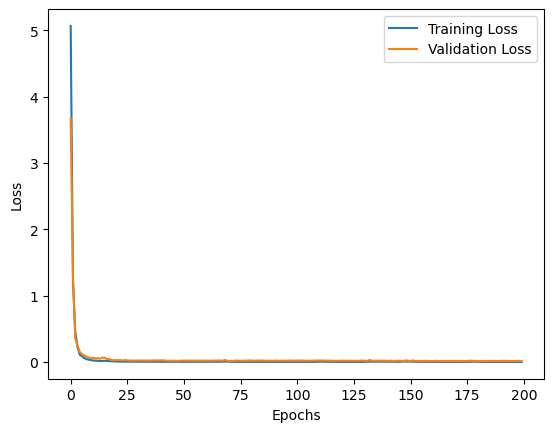

In [10]:
# สร้างกราฟแสดงการฝึกโมเดล
plt.plot(history.history['loss'], label='Training Loss')  # Loss ในชุดฝึก
plt.plot(history.history['val_loss'], label='Validation Loss')  # Loss ในชุดทดสอบ
plt.xlabel('Epochs')  # ชื่อแกน X
plt.ylabel('Loss')  # ชื่อแกน Y
plt.legend()  # เพิ่มคำอธิบายกราฟ
plt.show()  # แสดงกราฟ